### 2022217420 何金阳    基于随机森林算法的对Fasion MNIST数据集的可视化分类
#### 为什么选择随机森林算法？
#### 随机森林算法基于决策树算法，而决策树算法本身可以解决分类问题。因此针对本题对FashionMINST数据库的分类问题，随机森林在解决分类问题时，它的原理比较简单，同时部署方便，可以通过sklearn中的方法进行直接配置，而不需要额外搭建神经网络，同时随机森林对内存的消耗量比较小，而且也有着不错的效果，因此我选择随机森林来解决此类分类问题。
#### 下面是我完成此问题的详细过程
#### 1.首先导入需要的包，这里由于我使用了随机森林算法，所以直接导入scikit-learn中的随机森林模型，并且导入了GridSearchCV来获取最好超参数，同时通过pytorch中的datasets方法来获取需要的Fashion MNIST数据集，同时需要绘制分类报告以及采用交叉验证去更好的评估模型的性能，又导入了相应的包 

In [11]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd
from torchvision import datasets, transforms
import multiprocessing
import seaborn as sns

import os
os.environ["CUDA_VISIBLE_DIVICES"] = "0"



import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import fetch_openml

#### 首先将图像转换成Tensor形式的数据然后下载FashionMNIST这个数据集，进而可获取到Tensor形式的数据集，随后我们将Tensor形式的数据转换成numpy形式，并且从中提取训练集和测试集的数据和标签。

In [2]:
transform = transforms.Compose([
        transforms.ToTensor()  
    ])
 
    
train_dataset = datasets.FashionMNIST(
        root="./dataset/mnist",
        train=True,
        transform=transform,
        download=True
    )
 
test_dataset = datasets.FashionMNIST(
        root="./dataset/mnist",
        train=False,
        transform=transform,
        download=True
)
 
    
X_train = train_dataset.data.numpy().reshape(-1, 28 * 28)  
y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy().reshape(-1, 28 * 28)
y_test = test_dataset.targets.numpy()

#### 数据预处理及可视化

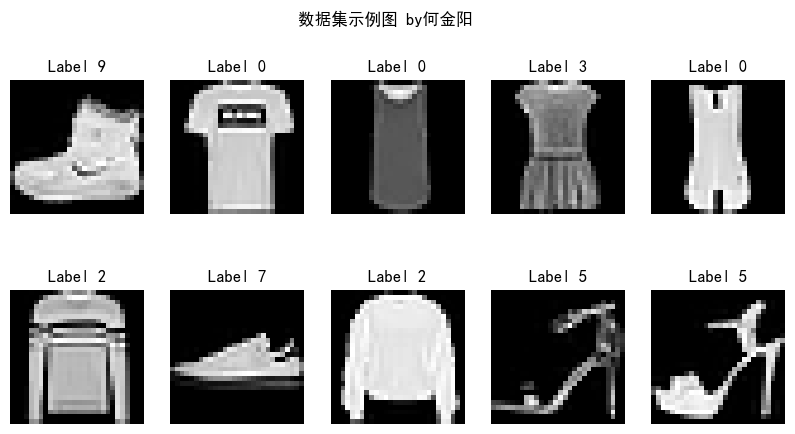

In [3]:
labels_dict = {0: 'Label 0', 1: 'Label 1', 2: 'Label 2', 3: 'Label 3', 4: 'Label 4', 
                   5: 'Label 5', 6: 'Label 6', 7: 'Label 7', 8: 'Label 8', 9: 'Label 9'}
def plot_images(images, labels):  
    n = min(len(images), 10)
    plt.figure(figsize=(10, 5))
    for i in range(n):
        ax = plt.subplot(2, 5, i + 1)
        img = images[i].reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.title(labels_dict[labels[i]])
        plt.axis('off')
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.suptitle('数据集示例图 by何金阳')  
    plt.show()

plot_images(X_train, y_train)

#### 从scikit-learn中直接创建并且拟合一个随机森林模型

In [4]:
rf_classifier = RandomForestClassifier(random_state=0)

#### 我这里采用网格搜索方法来寻找最优超参数组合同时并将它们进行输出，采用树的数量和最大深度如下

In [4]:
param_grid = {
        'n_estimators': [100, 200, 300],  
        'max_depth': [10, 20, 30, None],  
    }
 
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
 
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': 30, 'n_estimators': 300}


#### 选取最佳模型并输出

In [5]:
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=300, random_state=0)

#### 通过交叉验证方法先对模型进行初步评估

In [6]:
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8798


#### 加载数据集

In [5]:
fashion_mnist = fetch_openml(data_id=40996)

#### 将数据集中的图像和标签数据提取出来

In [6]:
X = fashion_mnist.data.astype('float32')
y = fashion_mnist.target.astype('int')

#### 将提取出的数据分为训练集和测试集

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 对随机森林模型根据超参数进行初始化并通过训练集进行训练

In [8]:
rf_classifier = RandomForestClassifier(n_estimators=300, max_depth=30, random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=300, random_state=0)

#### 将训练好的模型进行预测

In [9]:
y_pred = rf_classifier.predict(X_test) 

#### 算出精确度并描绘分类报告

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8855714285714286


In [13]:
print("分类报告     by何金阳")
print(classification_report(y_test, y_pred))

分类报告     by何金阳
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1394
           1       0.99      0.97      0.98      1402
           2       0.80      0.83      0.81      1407
           3       0.89      0.92      0.90      1449
           4       0.77      0.85      0.81      1357
           5       0.97      0.96      0.96      1449
           6       0.74      0.60      0.67      1407
           7       0.94      0.94      0.94      1359
           8       0.96      0.98      0.97      1342
           9       0.95      0.96      0.95      1434

    accuracy                           0.89     14000
   macro avg       0.88      0.89      0.88     14000
weighted avg       0.88      0.89      0.88     14000



#### 输出特征重要性并绘制出图片

In [14]:
feature_importance = rf_classifier.feature_importances_

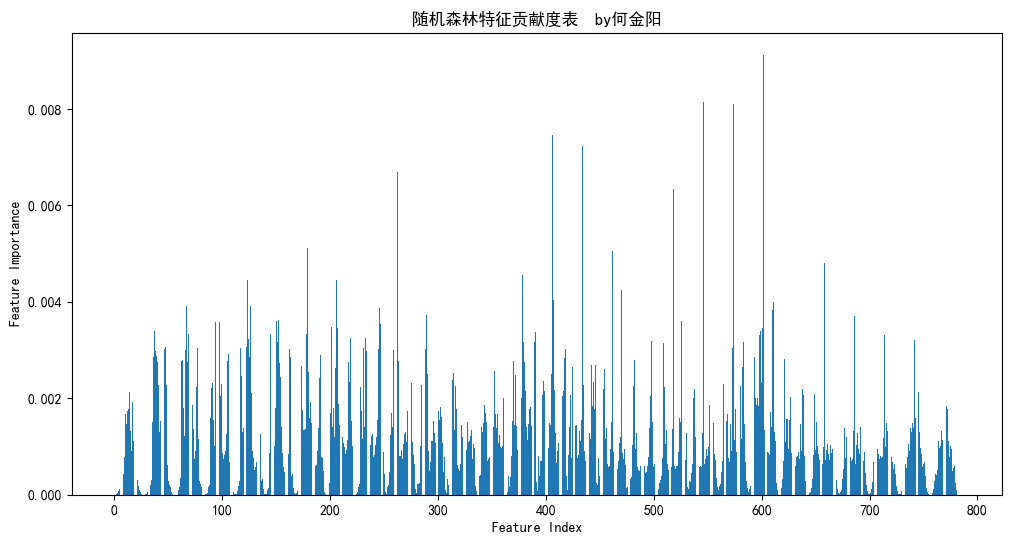

In [15]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("随机森林特征贡献度表  by何金阳")
plt.savefig('./Random Forest Feature Importance.png')
plt.show()

#### 混淆矩阵计算

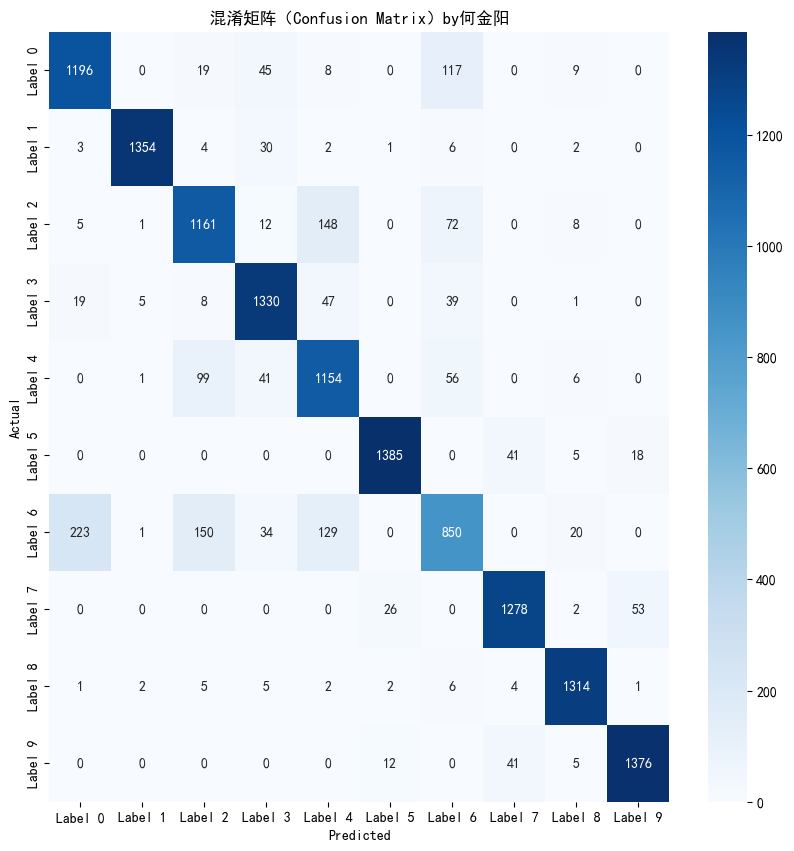

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(labels_dict.values()), yticklabels=list(labels_dict.values()))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title('混淆矩阵（Confusion Matrix）by何金阳')
plt.show()